# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


# Importing Data

In [3]:
df = pd.read_csv('train.csv', encoding = 'latin1')
df.head(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [5]:
test_set = pd.read_csv('test.csv', encoding = 'latin1')

# Sentiment Distribution

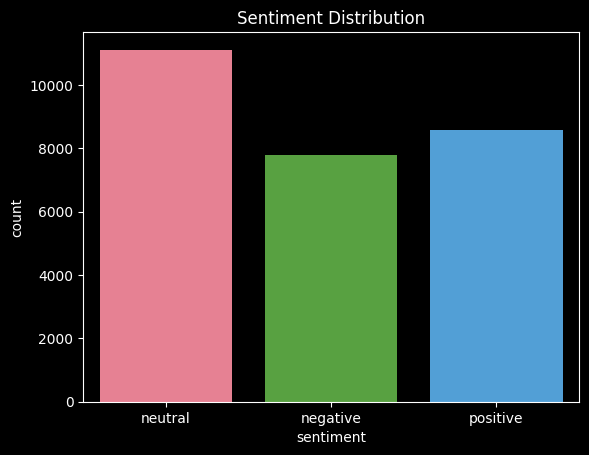

In [6]:
plt.style.use('dark_background')
sns.countplot( data= df,x='sentiment', palette='husl')
plt.title('Sentiment Distribution')
plt.show()


# Age Distribution

In [7]:
df['Age of User'].value_counts()

Age of User
0-20      4581
21-30     4580
31-45     4580
46-60     4580
60-70     4580
70-100    4580
Name: count, dtype: int64

In [8]:
# Convert age interval to numeric value using mean
age_mapping = {
    '0-10' : 10,
    '21-30' : 25,
    '31-45' : 38,
    '46-60' : 53,
    '60-70' : 65,
    '70-100' : 85
}
df['Age of User'] = df['Age of User'].map(age_mapping)
# Dropping infinite values
df['Age of User'] = df['Age of User'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset='Age of User')
df['Age of User']

1        25.0
2        38.0
3        53.0
4        65.0
5        85.0
         ... 
27475    25.0
27476    38.0
27477    53.0
27478    65.0
27479    85.0
Name: Age of User, Length: 22900, dtype: float64

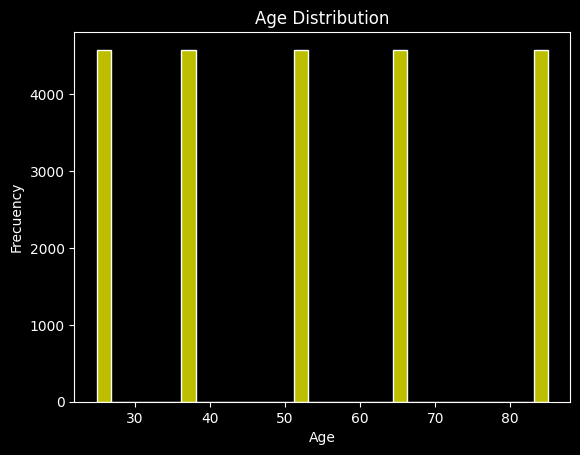

In [9]:
# Ploting
sns.histplot(data=df, x = 'Age of User', color= 'yellow')
plt.xlabel('Age')
plt.ylabel('Frecuency')
plt.title('Age Distribution')
plt.show()

# Country Distribution

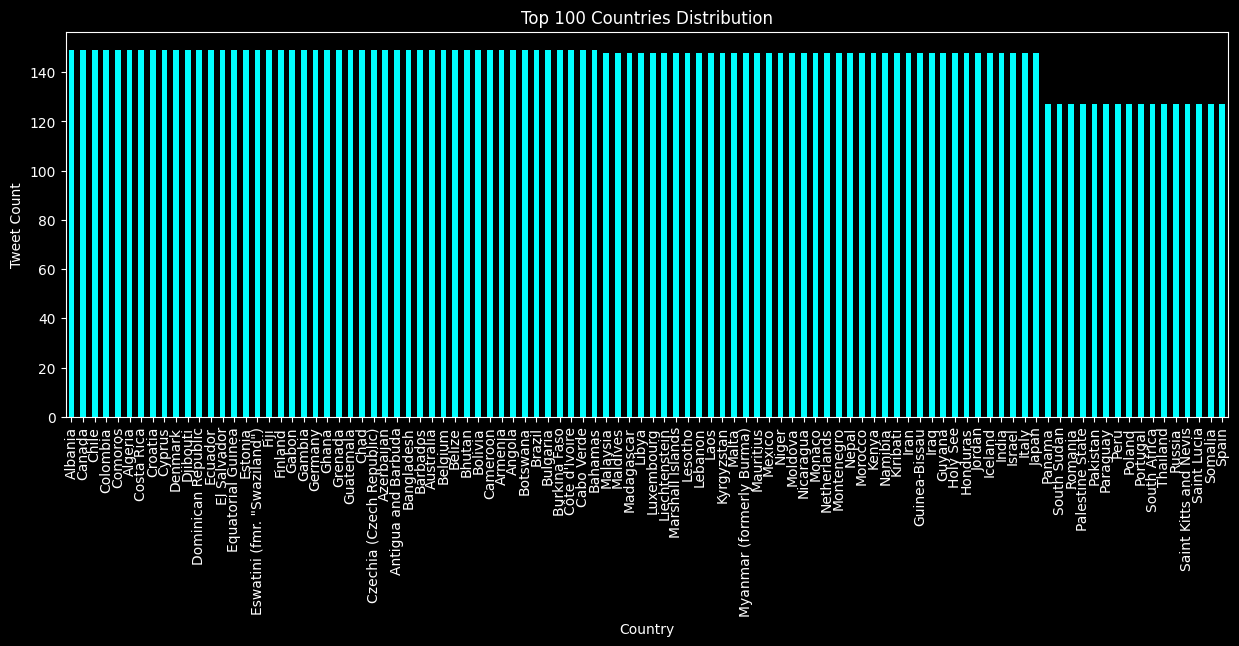

In [10]:
plt.figure(figsize=(15, 5))
top_countries = df['Country'].value_counts().nlargest(100)
top_countries.plot(kind='bar', color= 'cyan')
plt.title('Top 100 Countries Distribution')
plt.xlabel('Country')
plt.ylabel('Tweet Count')
plt.show()

# Population and Land Area

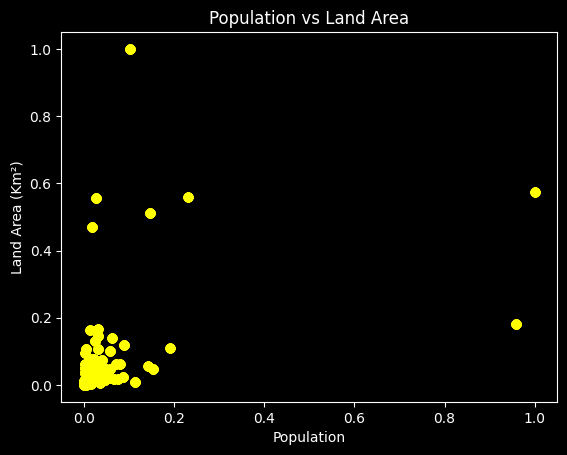

In [11]:
# Normalizing "Population -2020", "Land Area (Km²)", "Density (P/Km²)"
scaler = MinMaxScaler()
df[["Normalized Population", "Normalized Land Area", "Normalized Density (P/Km²)"]] = scaler.fit_transform(df[["Population -2020", "Land Area (Km²)", "Density (P/Km²)"]])

# Scatter plot of Population vs Land Area
plt.scatter(df["Normalized Population"], df["Normalized Land Area"], color = 'yellow')
plt.title("Population vs Land Area")
plt.xlabel("Population")
plt.ylabel("Land Area (Km²)")
plt.show()

# Demographic Correlation

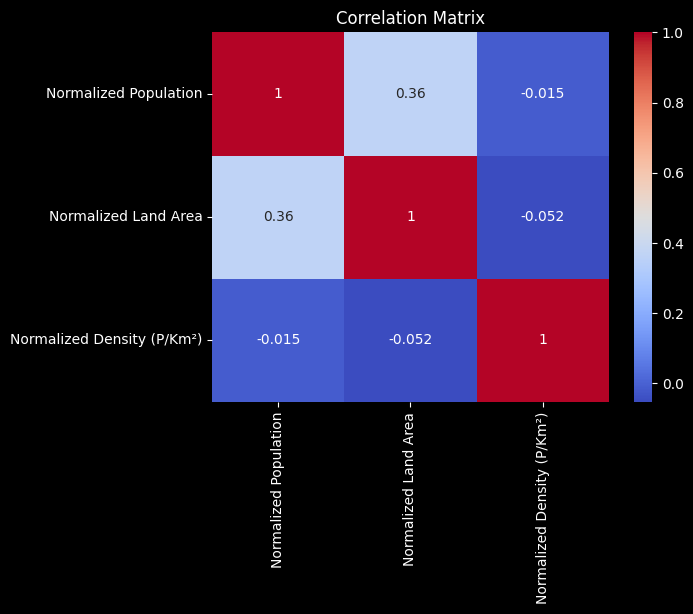

In [12]:
# Correlation matrix
correlation_matrix = df[["Normalized Population", "Normalized Land Area", "Normalized Density (P/Km²)"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Sentiment By Time

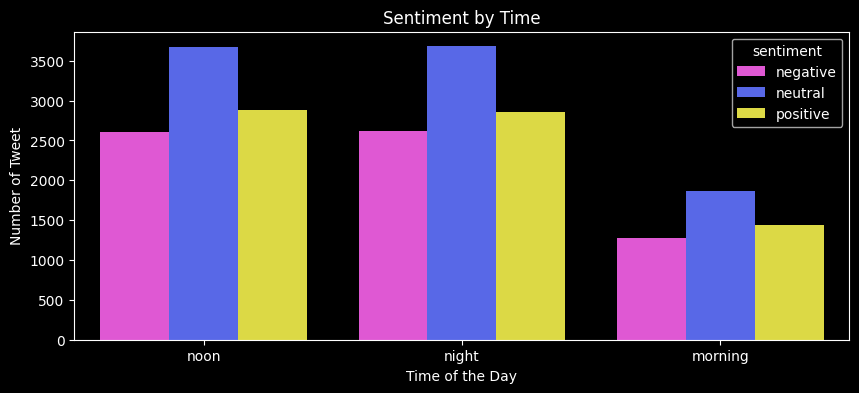

In [22]:
plt.figure(figsize=(10,4))
custom_palette = sns.color_palette(['#f542e6', '#4056ff', '#f5f12c'])
sns.set_palette(custom_palette)
sns.countplot(data=df, x='Time of Tweet', hue='sentiment')
plt.title('Sentiment by Time')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Tweet')
plt.savefig("sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

# Sentiment by Age

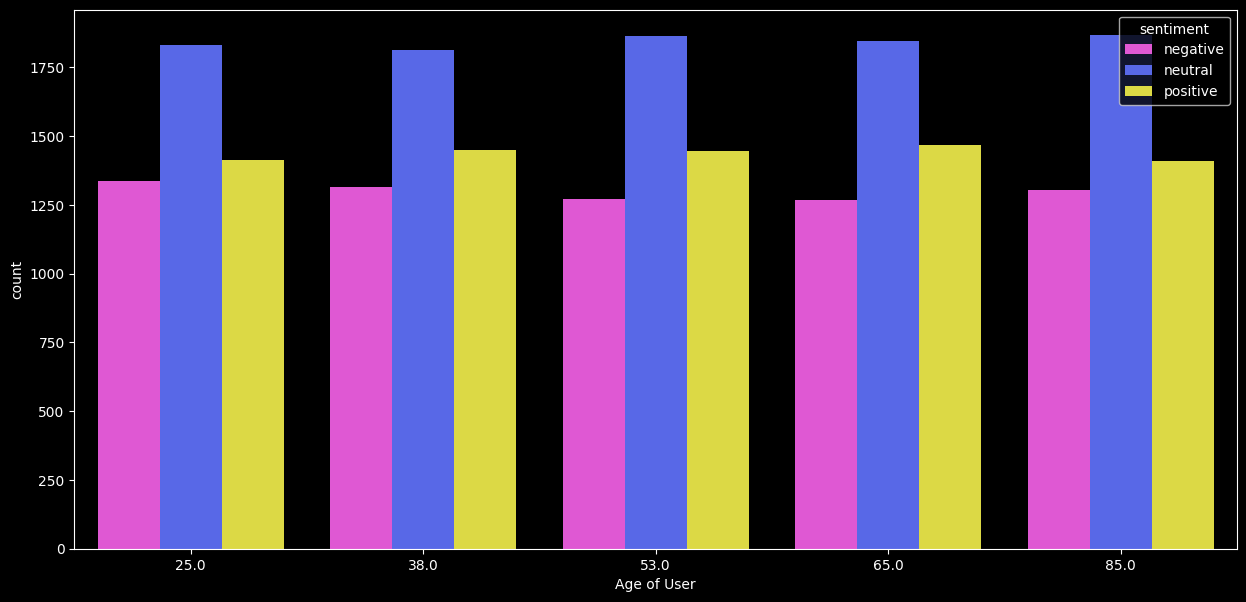

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(data =df, x='Age of User', hue='sentiment',)
plt.show()

# Sentiment by Text Length

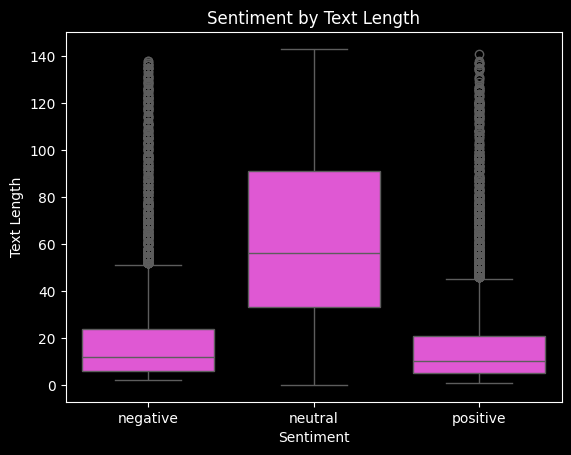

In [24]:
df["selected_text"] = df["selected_text"].fillna("").astype(str)

# Adding a column for text length
df["Text Length"] = df["selected_text"].apply(len)

# Sentiment by text length
sns.boxplot(x="sentiment", y="Text Length", data=df)
plt.title("Sentiment by Text Length")
plt.xlabel("Sentiment")
plt.ylabel("Text Length")
plt.show()